## 택시운행 데이터 불러오기

#### 데이터 소스
뉴욕의 2013년 택시 운행 데이터를 읽어보겠다. 용량은 50GB이고, 날짜, 탑승지, 하차장소, 요금 등의 정보를 포함하여 170만개의 운행정보를 가지고 있다. 데이터 용량을 줄이기 위해 전체 데이터 중 0.5%에 해당하는 85만건의 운행정보만 읽어봄.

이 데이터에 대한 소개는 hubcab.org 를 참고하기 바람.

https://drive.google.com/open?id=0ByLGiouKh_uYTnM4N3pxVWVrMFk 데이터가 대용량인 관계로 github업로드가 불가능하여 google 드라이브에 공유하였다. 다운로드할 경로는 해당 디렉토리에 속한 data 디렉토리이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 path
data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

In [3]:
# 데이터 읽기
data = pd.read_csv(data_filename, parse_dates=['pickup_datetime','dropoff_datetime']) # 승차 데이터
fare = pd.read_csv(fare_filename, parse_dates=['pickup_datetime'])# 요금 데이터

In [4]:
data.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392


In [5]:
fare.head(3)

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:52,CSH,7.5,0.5,0.5,0.0,0.0,8.5


### matplotlib을 활용한 그래프 그리기

In [6]:
# 승차 데이터 속성값 출력
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [7]:
# 요금 뎅터 속성값 출력
fare.columns

Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [8]:
p_lng = data.pickup_longitude # 승차 경도
p_lat = data.pickup_latitude # 승차 위도
d_lng = data.dropoff_longitude # 하차 위도
d_lat = data.dropoff_latitude # 하차 경도

In [9]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [10]:
px, py = lat_lng_to_pixels(p_lat, p_lng)

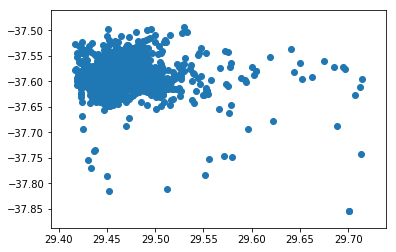

In [11]:
# 산점도 출력
plt.clf()
plt.scatter(px, py)
plt.show()

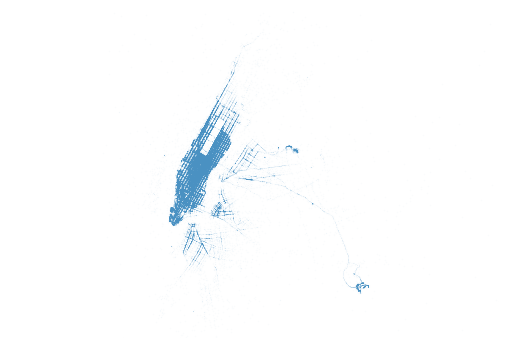

In [12]:
# 지도처럼 출력
plt.clf()
plt.figure(figsize=(8, 6))
plt.scatter(px, py, s=.1, alpha=.03) # 점 크기 설정(s) 및 투명도 설정(alpha)
plt.axis('equal') # x, y축 비율 맞춤
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.axis('off') # 축 없애기
plt.show()

### 그림 라이브러리 seaborn
matplotlib로 그림을 그리려면 시행착오 과정을 많이 거쳐야 한다. 이를 편리하게 해결하는 라이브러리로 seaborn을 사용하겠다. seaborn을 설치하면 그림을 그릴 때 자동을 깔끔하게 만들어준다.

In [13]:
px.count(), px.min(), px.max()

(846945, 29.417137499999995, 29.714313055555561)

In [14]:
px.mean(), px.median(), px.std()

(29.45134580776863, 29.449418333333337, 0.009761694274451149)

In [15]:
import seaborn as sns
# 히스토그램 출력
data.trip_distance.hist(bins=np.linspace(0., 10., 100))

## 데이터 전처리

In [16]:
# 데이터 선택

data[['trip_distance', 'trip_time_in_secs']].head(5)
# 두개의 컬럼만 선택하고 상위 3개의 행에 해당하는 데이터만 읽음

,trip_distance,trip_time_in_secs
0,0.61,300
1,3.28,960
2,1.50,386
3,0.00,0
4,1.31,360


In [17]:
data.loc[840000]
# 첫번째 행(row)의 값을 읽음

medallion             B15C4DE03944CDA9D837DE778FA10FCD
hack_license          20A8952E97ED1F916C8BC5DFB5C7EE7A
vendor_id                                          CMT
rate_code                                            1
store_and_fwd_flag                                   N
pickup_datetime                    2013-12-28 18:06:56
dropoff_datetime                   2013-12-28 18:36:40
passenger_count                                      1
trip_time_in_secs                                 1784
trip_distance                                      1.1
pickup_longitude                              -73.9929
pickup_latitude                                40.7684
dropoff_longitude                             -73.9943
dropoff_latitude                               40.7542
Name: 840000, dtype: object

In [18]:
# 0과 100000번 데이터 행을 읽는다
data.loc[[0, 100000]]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
100000,7461F7106D33D3A5775F4245724606FD,BACEA353BB4106A005BB7836BDCAC0C3,VTS,1,NaN,2013-02-12 18:10:00,2013-02-12 18:20:00,2,600,2.02,-73.966454,40.770512,-73.958862,40.778042


In [19]:
data.loc[1000:2000:10,
         ['trip_distance', 'trip_time_in_secs']]

# 행과 열을 동시에 선택할 수 있는데, 행을 먼저 정해주어야 한다.

data.loc[data.trip_distance>50]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1853,DA2A0A9EBD9AFD25013CF83805B61D6D,A3BCE60F48302B63C4B7AAE443960704,CMT,1,N,2013-01-01 21:41:03,2013-01-01 21:56:37,1,934,52.20,-73.979576,40.743626,-73.941902,40.807281
6316,6BD1B641A1CD55803A21560299B985A7,A33DB5A909ADBFCE2AB057264141C8E9,CMT,1,N,2013-01-04 06:44:21,2013-01-04 07:17:14,1,1973,96.30,-73.959785,40.762497,-73.962440,40.662910
8683,E95D27A43DC7A5F0C015409386BB49DB,8A6EB7FA7E6A3F4A50C717871C068D72,CMT,1,N,2013-01-05 01:51:08,2013-01-05 02:23:01,1,1913,52.90,-74.006119,40.735157,-73.958694,40.714905
24381,A38882246FC6439948FA470459F94134,8A60E3668580091A4BB124E9BDAFDD89,CMT,1,N,2013-01-12 03:02:55,2013-01-12 03:24:47,1,1312,66.20,-73.966873,40.683315,-73.916885,40.754852
54723,0F48C5AE255A294B4E88ECC3CED0CFC5,C92D893B061C29C152ADF42B15317C3E,CMT,5,N,2013-01-24 21:07:13,2013-01-24 21:31:44,1,1471,79.40,-73.885735,40.771580,-73.984947,40.758060
90068,7B59F6023736C5217B613D17B4ED6A9C,F2D89276E3886C6A8D27AE463637FF36,CMT,1,N,2013-02-08 01:54:21,2013-02-08 02:02:03,1,461,70.90,-73.985512,40.742313,-73.993950,40.720837
115471,FB0FAE6EABFE14F45600AD382B52EFE5,0D39DD3359634605EAC8B451295E8186,CMT,1,N,2013-02-18 19:52:08,2013-02-18 20:07:33,1,925,67.20,-73.874474,40.773975,-73.937866,40.723824
119002,A51E7B7371667690E65D88307FBBA229,3A6EDD62A2933A11545527FDE55DAC52,CMT,1,N,2013-02-20 12:20:03,2013-02-20 12:43:12,1,1389,87.90,-73.862915,40.769157,-73.973579,40.748199
134839,FA189EABBB4058AC0359AA1CF30F5313,C707B5A8C6AEF269564272AF66B37564,CMT,1,Y,2013-02-26 17:54:11,2013-02-26 18:45:03,1,3052,69.80,-73.989853,40.729340,-73.964035,40.771950
157050,C4580AE98B332B1E4B6B822B1C2D03BE,E2CB66B7D37105F7C3364DFF61E4D487,VTS,2,NaN,2013-03-07 12:34:00,2013-03-07 15:24:00,6,10200,60.14,-73.777405,40.646626,-73.982193,40.769535


### 벡터 연산

파이선은 벡터 연산을 지원한다. 즉, for 문을 쓸 필요없이 Seires 나 DataFrame 구조에 대해서 모든 항목에 대해 연산을 한번에 처리할 수 있다. 아래는 초 단위로 된 차량 운행 시간을 분 단위로 한번에 바꾸는 것을 보인 예이다. 컬럼을 하나 추가하면서 이름을 'trip_time_in_mins'로 지정했다.
> 시리즈 (Series) 변수들을 연산할 때에는 인덱스가 같은 항목끼리 연산이 이루어진다.

In [20]:
data['trip_time_in_mins'] = data.trip_time_in_secs / 60.0
data[['trip_time_in_secs', 'trip_time_in_mins']].head(3)

,trip_time_in_secs,trip_time_in_mins
0,300,5.000000
1,960,16.000000
2,386,6.433333


In [21]:
data.medallion.head(3)
data.medallion.str.slice(0, 4).head(3)

# 날짜와 시간
# 요일을 찾으려면 dt.dayofweek()를 이용하면 되는데 월요일은 1, 활요일은 2, ... 값이 리턴된다.

data.pickup_datetime.dt.dayofweek[::200000]

day_p = data.pickup_datetime.dt.day
day_d = data.dropoff_datetime.dt.day
selection = (day_p != day_d) # 타고 내린 날짜가 다른 경우를 찾음
print(len(data.loc[selection]))
data.loc[selection].head(3)

7716


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_time_in_mins
2005,6385CA8C99985BFBAFB477A9BDFA28C9,08A78365909D2F09BF72B869C0B21FED,VTS,1,NaN,2013-01-01 23:45:00,2013-01-02 00:03:00,1,1080,12.61,-73.873062,40.774128,-73.983597,40.721539,18.000000
2008,D932DC772B89F69D30F03FB095424F97,F5AE2E36090433DFE4142AFC19AFD495,CMT,1,N,2013-01-01 23:46:22,2013-01-02 00:28:01,1,2498,16.10,-73.781921,40.644657,-73.998512,40.660194,41.633333
2010,33BB4B9DBFD87B7522909FEEB84896F4,412253C6258AF9DCE2D27DE714A84049,CMT,1,N,2013-01-01 23:46:53,2013-01-02 00:03:33,1,1000,5.40,-74.001274,40.725952,-73.980347,40.660503,16.666667


## 그루핑

In [22]:
#Group-by

weekly = data.groupby(data.pickup_datetime.dt.weekofyear)
len(weekly)
y = weekly.size()
y.head(10)

x = weekly.pickup_datetime.first()
x.head(3)

pd.Series(y.values, index=x).plot()
plt.ylim(0)  # Set the lower y value to 0.
plt.xlabel('Week')  # Label of the x axis.
plt.ylabel('Taxi rides')  # Label of the y axis.

In [23]:
### Joins
tip = fare[['medallion', 'tip_amount']].loc[fare.tip_amount>0].groupby('medallion').mean()
print(len(tip))
tip.head(10)

13407


,tip_amount
medallion,
00005007A9F30E289E760362F69E4EAD,1.815854
000318C2E3E6381580E5C99910A60668,2.857222
000351EDC735C079246435340A54C7C1,2.099111
0009986BDBAB2F9A125FEF49D0BFCCDD,2.220000
00115F46520039845A5F719C979BEA45,3.422222
00153E36140C5B2A84EA308F355A7925,2.704687
001C8EC421C9BE57D08576617465401A,2.895455
001D3B86C2ACDEE4D1B98AFE52969F3D,2.520455
001DFAC01BC0A32F48C3769DD1414778,2.164865


In [24]:
# 히스토그램 출력
tip.hist(bins=np.linspace(0., 6., 50))
plt.xlabel('Average tip')
plt.ylabel('Number of taxis')

In [25]:
# merge() 두개의 데이터프레임을 합하여 새로운 컬럼을 추가할 때 사용된다.
data_merged = pd.merge(data, tip, how='left', left_on='medallion', right_index=True)
data_merged.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_time_in_mins,tip_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,5.000000,3.180417
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722,16.000000,2.863235
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392,6.433333,2.147143
